In [8]:
from rossby_waves import *
from math import floor
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from rossby_waves.rossby_waves import amplitude, dispersion, grid, trajectory, trajectories, vel, trajectory2
from matplotlib.animation import FuncAnimation, PillowWriter

In [9]:
#ro is RossbyOcean of grid of Rossbywaves, should be periodic
r = RossbyWave(np.array([5, 5]))
ro = RossbyOcean([r])
ro.add_grid_waves()
ro.remove_wave(0)
#grid of 3x3 points
testgrid = grid(3)

In [10]:
#coordinates of trajectory starting at (1,0) and (1.2,3.09)
x0 = np.array([[1,0], [1.2,3.09]])
x, y = trajectory(ro, x0, 0, 0.05, 1/4000, eps=0)


In [11]:
#testing
x0 = np.array([1.2,3.09])
x_, y_ = trajectory2(ro, x0, 0, 0.05, 1/4000, solenoidal=True)

In [12]:
y_ == y[1]

True

In [13]:
#x, y coordinates of trajectory starting at 3x3 grid
x, y = trajectory(ro, testgrid, 0, 0.1, 1/4000, eps=0)

In [45]:
#testing
x_list = [None]*9
y_list = [None]*9

for i in range(9):
    x0 = testgrid2[i]
    x_, y_ = trajectory2(ro, x0, 0, 0.1, 1/4000, solenoidal=True)
    x_list[i], y_list[i] = x_, y_

In [53]:
x, y = trajectory(ro, grid(1), 0, 0.1, 1/4000, solenoidal=True)

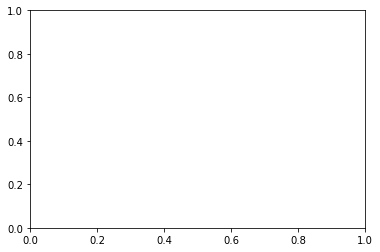

In [57]:
x0 = np.array([[1,0]])
#animation attempt of one particle
fig, ax = plt.subplots(1)
ax.set(xlim=(-np.pi, np.pi), ylim=(-np.pi, np.pi))

x, y = trajectory(ro, x0, 0, 0.05, 1/4000, eps=1)
X, Y = np.meshgrid(np.linspace(-np.pi, np.pi, 20), np.linspace(-np.pi, np.pi, 20))
u, v = ro.velocity(X, Y, 0, solenoidal=True)
ax.quiver(X, Y, u, v)

def init_func():
    plt.cla()

def update_plot(i):
    plt.cla()
    ax.set(xlim=(-np.pi, np.pi), ylim=(-np.pi, np.pi))
    plt.scatter(x[0][i], y[0][i])
    ax.quiver(X, Y, u, v)

anim = FuncAnimation(fig, update_plot, frames=np.arange(0, len(x[0])), init_func=init_func)

writergif = PillowWriter(fps=30)
anim.save('testing.gif', writer=writergif)

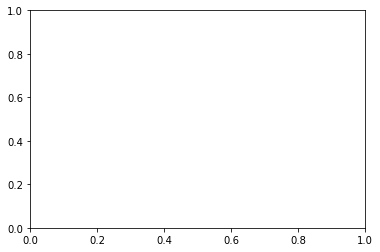

In [5]:
#animation attempt of position of multiple particles
x0 = grid(100)
fig, ax = plt.subplots(1)
ax.set(xlim=(-np.pi, np.pi), ylim=(-np.pi, np.pi))
x_list, y_list = trajectory(ro, x0, 0, 0.05, 1/4000, eps=0.1)

#X, Y = np.meshgrid(np.linspace(-np.pi, np.pi, 20), np.linspace(-np.pi, np.pi, 20))
#u, v = ro.velocity(X, Y, 0, solenoidal=True)
#ax.quiver(X, Y, u, v)

def init_func():
    plt.cla()

def update_plot(i):
    plt.cla()

    x_traj = []
    for coord_list in x_list:
        x_traj.append(coord_list[i])
    y_traj = []
    for coord_list in y_list:
        y_traj.append(coord_list[i])
    ax.set(xlim=(-np.pi, np.pi), ylim=(-np.pi, np.pi))
    plt.scatter(x_traj, y_traj, s = 0.1)
    #ax.quiver(X, Y, u, v)

anim = FuncAnimation(fig, update_plot, frames=np.arange(0, len(x_list[0])), init_func=init_func)

writergif = PillowWriter(fps=30)
anim.save('testing.gif', writer=writergif)


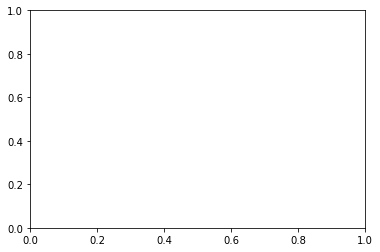

In [6]:
#animation attempt of trajectories
x0 = grid(100)
fig, ax = plt.subplots(1)
ax.set(xlim=(-np.pi, np.pi), ylim=(-np.pi, np.pi))
x_list, y_list = trajectory(ro, x0, 0, 0.01, 1/4000, solenoidal=True)

#X, Y = np.meshgrid(np.linspace(-np.pi, np.pi, 20), np.linspace(-np.pi, np.pi, 20))
#u, v = ro.velocity(X, Y, 0, solenoidal=True)
#ax.quiver(X, Y, u, v)
x_traj, y_traj = [], []
def init_func():
    plt.cla()

def update_plot(i):
    plt.cla()
    for coord_list in x_list:
        x_traj.append(coord_list[i])
    for coord_list in y_list:
        y_traj.append(coord_list[i])
    ax.set(xlim=(-np.pi, np.pi), ylim=(-np.pi, np.pi))
    plt.scatter(x_traj, y_traj, s = 0.2)
    #ax.quiver(X, Y, u, v)

anim = FuncAnimation(fig, update_plot, frames=np.arange(0, len(x_list[0])), init_func=init_func)

writergif = PillowWriter(fps=30)
anim.save('testing.gif', writer=writergif)